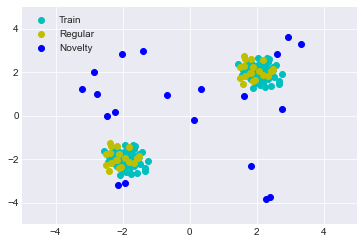

In [2]:
# 必要なライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid') 

# 乱数シードの固定
np.random.seed(1)

# 訓練データの生成
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]

# 正常なデータの生成
X = 0.3 * np.random.randn(20, 2)
X_regular = np.r_[X + 2, X - 2]

# 特異なデータの生成
X_novelty = np.random.uniform(low=-4, high=4, size=(20, 2))

# 擬似データの可視化
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.scatter(X_train[:, 0], X_train[:, 1], c='c', label='Train')
plt.scatter(X_regular[:, 0], X_regular[:, 1], c='y', label='Regular')
plt.scatter(X_novelty[:, 0], X_novelty[:, 1], c='b', label='Novelty')
plt.legend(loc='upper left')
plt.show()

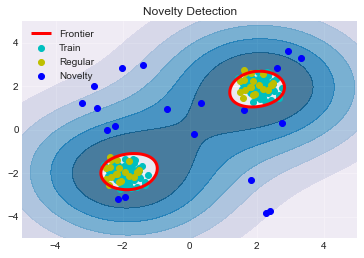

In [3]:
# 必要なライブラリのインポート
from sklearn import svm

# OneClass SVMの適用（RBFカーネルを適用）
model = svm.OneClassSVM(kernel='rbf', nu=0.01, gamma=0.1)
model.fit(X_train)

# 擬似データおよび特定した境界線（frontier）の可視化
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))

Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Novelty Detection")
plt.xlim((-5, 5))
plt.ylim((-5, 5))

plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu, alpha=0.7)
frontier = plt.contour(xx, yy, Z, levels=[0], linewidths=3, colors='red')
train = plt.scatter(X_train[:, 0], X_train[:, 1], c='c')
normal = plt.scatter(X_regular[:, 0], X_regular[:, 1], c='y')
novelty = plt.scatter(X_novelty[:, 0], X_novelty[:, 1], c='b',)
plt.legend([frontier.collections[0], train, normal, novelty],
           ['Frontier','Train', 'Regular', 'Novelty'],
           loc='upper left',shadow=True)
plt.show()

In [4]:
# 構築したモデルによる予測
y_pred_train = model.predict(X_train)
y_pred_regular = model.predict(X_regular)
y_pred_novelty = model.predict(X_novelty)

# 誤検知のデータ数のカウント
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_regular = y_pred_regular[y_pred_regular == -1].size
n_error_novelty = y_pred_novelty[y_pred_novelty == 1].size

# 結果の出力
print(f'Error Train: {n_error_train}/200')
print(f'Error Regular: {n_error_regular}/40')
print(f'Error Novelty: {n_error_novelty}/40')

Error Train: 3/200
Error Regular: 3/40
Error Novelty: 0/40


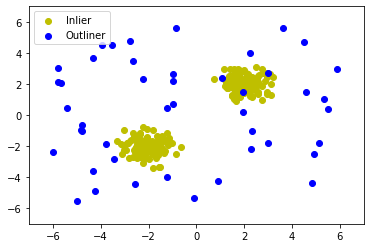

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

# 乱数シードの設定
np.random.seed(1)

# サンプルデータに関する設定
n_samples = 300
outlier_ratio = 0.15
n_outliers = int(n_samples * outlier_ratio)
n_inliers = n_samples - n_outliers

# 正常/外れ値データの生成
inliers = make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[0.5, 0.5],
                   random_state=0, n_samples=n_inliers, n_features=2)[0]
outliers = np.random.uniform(low=-6, high=6, size=(n_outliers, 2))

#訓練データの作成
X_train = np.concatenate([inliers ,outliers],axis=0)

#データの可視化
plt.scatter(inliers[:, 0], inliers[:, 1], label='Inlier', c='y')
plt.scatter(outliers[:,0], outliers[:,1],label="Outliner",c="b")
plt.legend(loc=2)
plt.xlim(-7,7)
plt.ylim(-7,7)
plt.show()

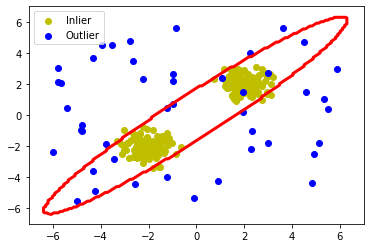

In [15]:
#必要なライブラリのインポート
from sklearn.covariance import EllipticEnvelope

#EllipticEnvelopeの適用
envelope = EllipticEnvelope(contamination=0.15)
envelope.fit(X_train)

#データおよび学習した決定境界の可視化
xx,yy = np.meshgrid(np.linspace(-7,7,150),np.linspace(-7,7,150))

Z = envelope.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)

plt.scatter(inliers[:, 0], inliers[:, 1], label='Inlier', c='y')
plt.scatter(outliers[:, 0], outliers[:, 1], label='Outlier', c='b')
plt.contour(xx, yy, Z, levels=[0], linewidths=3, colors='red')
plt.legend(loc='upper left')
plt.xlim(-7, 7)
plt.ylim(-7, 7)
plt.show()

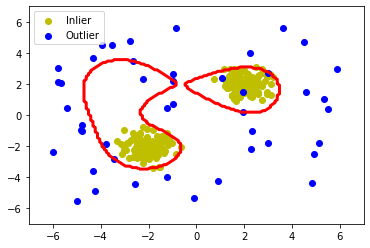

In [16]:
from sklearn import svm

svm = svm.OneClassSVM(nu=outlier_ratio,kernel="rbf",gamma=0.1)
svm.fit(X_train)

#データおよび学習した決定境界の可視化
xx,yy = np.meshgrid(np.linspace(-7,7,150),np.linspace(-7,7,150))

Z = svm.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)

plt.scatter(inliers[:, 0], inliers[:, 1], label='Inlier', c='y')
plt.scatter(outliers[:, 0], outliers[:, 1], label='Outlier', c='b')
plt.contour(xx, yy, Z, levels=[0], linewidths=3, colors='red')
plt.legend(loc='upper left')
plt.xlim(-7, 7)
plt.ylim(-7, 7)
plt.show()

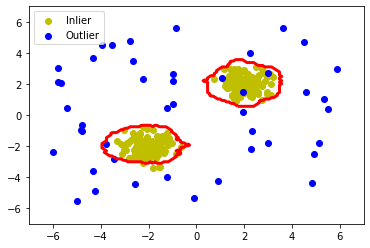

In [17]:
# 必要なライブラリのインポート
from sklearn.ensemble import IsolationForest

# 将来的にデフォルト値が変更される警告が出力されないように設定する
import warnings
warnings.simplefilter('ignore')

# IsolationForestの適用
isolation = IsolationForest(contamination=outlier_ratio, random_state=42)
isolation.fit(X_train)

# データおよび学習した決定境界の可視化
xx, yy = np.meshgrid(np.linspace(-7, 7, 150),
                     np.linspace(-7, 7, 150))

Z = isolation.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.scatter(inliers[:, 0], inliers[:, 1], label='Inlier', c='y')
plt.scatter(outliers[:, 0], outliers[:, 1], label='Outlier', c='b')
plt.contour(xx, yy, Z, levels=[0], linewidths=3, colors='red')
plt.legend(loc='upper left')
plt.xlim(-7, 7)
plt.ylim(-7, 7)
plt.show()

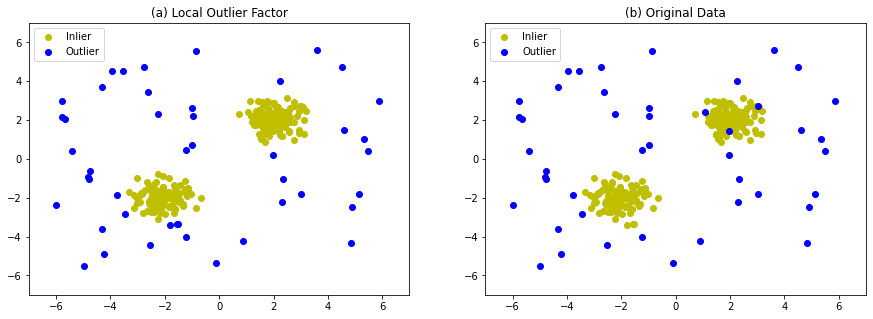

In [18]:
# 必要なライブラリのインポート
from sklearn.neighbors import LocalOutlierFactor

# LocalOutlierFactorの適用
lof = LocalOutlierFactor(n_neighbors=35, contamination=outlier_ratio)
lof.fit(X_train)
y_pred = lof.fit_predict(X_train)

# 学習結果の可視化
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title('(a) Local Outlier Factor')
plt.scatter(X_train[y_pred==1][:, 0], X_train[y_pred==1][:, 1], label='Inlier', c='y')
plt.scatter(X_train[y_pred==-1][:, 0], X_train[y_pred==-1][:, 1], label='Outlier', c='b')
plt.legend(loc='upper left')
plt.xlim(-7, 7)
plt.ylim(-7, 7)

plt.subplot(122)
plt.title('(b) Original Data')
plt.scatter(inliers[:, 0], inliers[:, 1], label='Inlier', c='y')
plt.scatter(outliers[:, 0], outliers[:, 1], label='Outlier', c='b')
plt.legend(loc='upper left')
plt.xlim(-7, 7)
plt.ylim(-7, 7)
plt.show()